In [32]:
# IMPORTING PANDAS
import pandas as pd

# IMPORTING NUMPY
import numpy as np

# IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

# IMPORTING SEABORN
import seaborn as sns

# CREATING INLINE FIGURES
%matplotlib inline

In [33]:
data = pd.read_csv('Datasets/Pre-Processed-Data.csv.')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   METALLOGEN         432 non-null    object 
 1   LOCALITY           432 non-null    object 
 2   STATE              432 non-null    object 
 3   TOPOSHEET          432 non-null    object 
 4   MINERAL_OR         432 non-null    object 
 5   HOSTROCK_TYPE1     430 non-null    object 
 6   HOSTROCK_TYPE2     430 non-null    object 
 7   HOSTROCK_TYPE3     432 non-null    object 
 8   HOSTROCK_TYPE4     432 non-null    object 
 9   MORPH-STRATABOUND  432 non-null    int64  
 10  MORPH-SEDIMENTARY  432 non-null    int64  
 11  MORPH-BEDDED       432 non-null    int64  
 12  MORPH-SHEAR        432 non-null    int64  
 13  MORPH-CONCORDANT   432 non-null    int64  
 14  MORPH-DISCORDANT   432 non-null    int64  
 15  MORPH-LENSOID      432 non-null    int64  
 16  MORPH-RESIDUAL     432 non

In [35]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,EASTERN GHAT BELT,BAGHDAPA,ORISSA,73 C,Be,PEGMATITE IN GRANULITE,-,-,-,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,SARGIPALLI BELT,SARGIPALLI,ORISSA,64 N,Pb,GARNETIFEROUS MICA SCHIST,-,-,-,1,...,0,0,0,0,1,0,0,0,0,2.63
2,RORO-JOJOHATU BELT,"RORO,JOJOHATU",JHARKHAND,73,Cr,ULTRAMAFIC SUIT,-,-,-,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,BONAI-NOAMUNDI-JAMDA BELT,ITAR-BALIJODI,ORISSA,73,Fe-Hematite,BHQ,SHALE INTERLAYERED WITH LAVA,-,-,0,...,0,0,0,0,0,0,0,1,0,3.00
4,BONAI-NOAMUNDI-JAMDA BELT,MERALGORA,JHARKHAND,73,Fe-Hematite,BHQ,SHALE,BHQ,-,0,...,0,0,0,0,0,0,0,1,0,1.50


In [36]:
input_df = data[:1].copy()

In [37]:
input_df["METALLOGEN"]

0    EASTERN GHAT BELT
Name: METALLOGEN, dtype: object

In [109]:
input_df = df[-1]
df = df[:-1] 

from sklearn.preprocessing import LabelEncoder

df['METALLOGEN'] = LE.fit_transform(df['METALLOGEN'])
df['LOCALITY'] = LE.fit_transform(df['LOCALITY'])
df['STATE'] =  LE.fit_transform(df['STATE'])
df['TOPOSHEET'] = LE.fit_transform(df['TOPOSHEET'])
df['HOSTROCK_TYPE1'] = LE.fit_transform(df['HOSTROCK_TYPE1'])
df['HOSTROCK_TYPE2'] = LE.fit_transform(df['HOSTROCK_TYPE2'])
df['HOSTROCK_TYPE3'] = LE.fit_transform(df['HOSTROCK_TYPE3'])
df['HOSTROCK_TYPE4'] = LE.fit_transform(df['HOSTROCK_TYPE4'])

ValueError: y contains previously unseen labels: 'EASTERN GHAT BELT'

input_df['LOCALITY'] = LE.transform(input_df['LOCALITY'])
input_df['STATE'] =  LE.transform(input_df['STATE'])
input_df['TOPOSHEET'] = LE.transform(input_df['TOPOSHEET'])
input_df['HOSTROCK_TYPE1'] = LE.transform(input_df['HOSTROCK_TYPE1'])
input_df['HOSTROCK_TYPE2'] = LE.transform(input_df['HOSTROCK_TYPE2'])
input_df['HOSTROCK_TYPE3'] = LE.transform(input_df['HOSTROCK_TYPE3'])
input_df['HOSTROCK_TYPE4'] = LE.transform(input_df['HOSTROCK_TYPE4'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [23]:
data['METALLOGEN'].shape

(432,)

In [40]:
LE = LabelEncoder()
data['METALLOGEN'] = LE.fit_transform(data['METALLOGEN'])
data['LOCALITY'] = LE.fit_transform(data['LOCALITY'])
data['STATE'] =  LE.fit_transform(data['STATE'])
data['TOPOSHEET'] = LE.fit_transform(data['TOPOSHEET'])
data['HOSTROCK_TYPE1'] = LE.fit_transform(data['HOSTROCK_TYPE1'])
data['HOSTROCK_TYPE2'] = LE.fit_transform(data['HOSTROCK_TYPE2'])
data['HOSTROCK_TYPE3'] = LE.fit_transform(data['HOSTROCK_TYPE3'])
data['HOSTROCK_TYPE4'] = LE.fit_transform(data['HOSTROCK_TYPE4'])
data['MINERAL_OR'] = LE.fit_transform(data['MINERAL_OR'])


In [11]:
len(data['METALLOGEN'].unique())

109

In [43]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [45]:
len(data[:-1])

431

In [8]:
len(data)

432

In [9]:
data["MINERAL_OR"].max()

41

In [67]:
# BALANCING THE DATA FOR CLASSIFICATION
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(data["MINERAL_OR"]))

Counter({24: 79, 13: 70, 1: 60, 0: 43, 36: 34, 29: 28, 30: 13, 10: 12, 27: 9, 9: 8, 18: 7, 23: 7, 26: 6, 40: 5, 38: 5, 37: 4, 25: 3, 20: 3, 6: 3, 3: 3, 35: 2, 34: 2, 5: 2, 19: 2, 22: 2, 41: 2, 4: 2, 21: 2, 8: 1, 11: 1, 39: 1, 12: 1, 33: 1, 17: 1, 32: 1, 14: 1, 16: 1, 2: 1, 28: 1, 31: 1, 15: 1, 7: 1})


Counter({'Fe-Hematite': 79, 'Cu': 70, 'Au': 60, 'Al-Bauxite': 43, 'Pb-Zn': 34, 'Mn': 28, 'Mn-Fe': 13, 'Cr': 12, 'Fe-Ti-V': 9, 'Be-Nb-Ta': 8, 'Cu-Pb': 7, 'Cu-Zn': 7, 'Fe-Magnetite': 6, 'WO3': 5, 'Pb-Zn-Cu': 5, 'Pb-Zn-Ag': 4, 'Fe-Hematite-Mn': 3, 'Cu-Pb-Zn': 3, 'Au-W': 3, 'Au-Cu': 3, 'Pb': 2, 'Nb-Ta-Li-Sn': 2, 'Au-Mo': 2, 'Cu-Pb-Ba': 2, 'Cu-U': 2, 'Zn': 2, 'Au-Cu-Zn': 2, 'Cu-Pb-Zn-Sb-Py': 2, 'Be': 1, 'Cr-PGE': 1, 'U': 1, 'Cs': 1, 'Nb-Ta': 1, 'Cu-Ni': 1, 'Mo-U-Cu': 1, 'Cu-Co': 1, 'Cu-Mo-Au': 1, 'Au-Ag-Cu-Pb-Zn': 1, 'Ma': 1, 'Mo': 1, 'Cu-Fe-Ti-V': 1, 'Ba': 1})

In [68]:
mineral_labels = {'Fe-Hematite': 24, 'Cu': 13, 'Au': 1, 'Al-Bauxite': 0, 'Pb-Zn': 36, 'Mn': 29, 'Mn-Fe': 30, 'Cr': 10, 'Fe-Ti-V': 27, 'Be-Nb-Ta': 9, 'Cu-Pb': 18, 'Cu-Zn': 23, 'Fe-Magnetite': 26, 'WO3': 40, 'Pb-Zn-Cu': 38, 'Pb-Zn-Ag': 37, 'Fe-Hematite-Mn': 25, 'Cu-Pb-Zn': 20, 'Au-W': 6, 'Au-Cu': 3, 'Pb': 35, 'Nb-Ta-Li-Sn': 34, 'Au-Mo': 5, 'Cu-Pb-Ba': 19, 'Cu-U': 12, 'Zn': 41, 'Au-Cu-Zn': 4, 'Cu-Pb-Zn-Sb-Py': 21, 'Be': 8, 'Cr-PGE': 11, 'U': 39, 'Cs': 12, 'Nb-Ta': 33, 'Cu-Ni': 17, 'Mo-U-Cu': 32, 'Cu-Co': 14, 'Cu-Mo-Au': 16, 'Au-Ag-Cu-Pb-Zn': 2, 'Ma': 28, 'Mo': 31, 'Cu-Fe-Ti-V': 15, 'Ba': 7}

In [69]:
ros=RandomOverSampler()
X,Y=ros.fit_resample(data,data["MINERAL_OR"])
print(Counter(Y))

Counter({8: 79, 35: 79, 10: 79, 24: 79, 29: 79, 25: 79, 30: 79, 13: 79, 11: 79, 0: 79, 34: 79, 9: 79, 27: 79, 1: 79, 5: 79, 18: 79, 19: 79, 36: 79, 39: 79, 20: 79, 22: 79, 12: 79, 33: 79, 6: 79, 40: 79, 41: 79, 3: 79, 17: 79, 38: 79, 23: 79, 4: 79, 37: 79, 32: 79, 14: 79, 16: 79, 2: 79, 26: 79, 28: 79, 31: 79, 15: 79, 7: 79, 21: 79})


In [13]:
X.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [14]:
len(X)

3318

X also contains RESERVE_AMT

# CLASSIFICATION MODEL

In [15]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import classification_report

# ANN

In [18]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680


In [19]:
X["MINERAL_OR"].nunique()

42

In [20]:
# Output LAyers =42
# Multiclass Classification - Softmax activation function

In [21]:
x = X.drop(["MINERAL_OR","RESERVE_AMT"],axis=1).values
y = X["MINERAL_OR"].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
x_train = scaler.fit_transform(x_train)

In [26]:
x_test = scaler.transform(x_test)

In [27]:
import tensorflow as tf
input_shape = x_train.shape

In [28]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten)
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=42,activation='softmax'))

In [29]:
model.build(input_shape)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2488, 200)               4600      
                                                                 
 dropout (Dropout)           (2488, 200)               0         
                                                                 
 dense_1 (Dense)             (2488, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (2488, 100)               0         
                                                                 
 dense_2 (Dense)             (2488, 42)                4242      
                                                                 
Total params: 28,942
Trainable params: 28,942
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode='max',verbose=1,patience=50)

In [34]:
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
78/78 [==============================] - 2s 3ms/step - loss: 3.7561 - accuracy: 0.0261 - val_loss: 3.7219 - val_accuracy: 0.0145
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7221 - accuracy: 0.0370 - val_loss: 3.6961 - val_accuracy: 0.0627
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7023 - accuracy: 0.0398 - val_loss: 3.6715 - val_accuracy: 0.1193
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6776 - accuracy: 0.0643 - val_loss: 3.6457 - val_accuracy: 0.2783
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6575 - accuracy: 0.0663 - val_loss: 3.6203 - val_accuracy: 0.3024
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6372 - accuracy: 0.0727 - val_loss: 3.5944 - val_accuracy: 0.3169
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6051 - accuracy: 0.0856 - val_loss: 3.5632 - val_accuracy: 0.3470
Epoch 

78/78 [==============================] - 0s 2ms/step - loss: 0.8210 - accuracy: 0.7520 - val_loss: 0.5208 - val_accuracy: 0.8578
Epoch 116/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8119 - accuracy: 0.7609 - val_loss: 0.5159 - val_accuracy: 0.8578
Epoch 117/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.7605 - val_loss: 0.5089 - val_accuracy: 0.8639
Epoch 118/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.7504 - val_loss: 0.5050 - val_accuracy: 0.8687
Epoch 119/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.7841 - accuracy: 0.7677 - val_loss: 0.4995 - val_accuracy: 0.8554
Epoch 120/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8029 - accuracy: 0.7717 - val_loss: 0.4945 - val_accuracy: 0.8699
Epoch 121/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.7613 - val_loss: 0.4905 - val_accuracy: 0.8663
Epoch 1

Epoch 172/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.8240 - val_loss: 0.3662 - val_accuracy: 0.8843
Epoch 173/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.8191 - val_loss: 0.3651 - val_accuracy: 0.8795
Epoch 174/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.8195 - val_loss: 0.3668 - val_accuracy: 0.8819
Epoch 175/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.8332 - val_loss: 0.3595 - val_accuracy: 0.8795
Epoch 176/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.8232 - val_loss: 0.3589 - val_accuracy: 0.8783
Epoch 177/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.8191 - val_loss: 0.3555 - val_accuracy: 0.8747
Epoch 178/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.8296 - val_loss: 0.3569 - val_accuracy:

Epoch 229/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.8533 - val_loss: 0.3015 - val_accuracy: 0.9012
Epoch 230/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8569 - val_loss: 0.2967 - val_accuracy: 0.9036
Epoch 231/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.8678 - val_loss: 0.2986 - val_accuracy: 0.9048
Epoch 232/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8525 - val_loss: 0.3036 - val_accuracy: 0.9012
Epoch 233/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8597 - val_loss: 0.2973 - val_accuracy: 0.9048
Epoch 234/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8565 - val_loss: 0.2988 - val_accuracy: 0.9012
Epoch 235/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8637 - val_loss: 0.2937 - val_accuracy:

Epoch 286/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8802 - val_loss: 0.2672 - val_accuracy: 0.9181
Epoch 287/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8758 - val_loss: 0.2654 - val_accuracy: 0.9181
Epoch 288/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8658 - val_loss: 0.2626 - val_accuracy: 0.9193
Epoch 289/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8702 - val_loss: 0.2619 - val_accuracy: 0.9205
Epoch 290/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8654 - val_loss: 0.2622 - val_accuracy: 0.9217
Epoch 291/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8830 - val_loss: 0.2608 - val_accuracy: 0.9205
Epoch 292/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8726 - val_loss: 0.2557 - val_accuracy:

Epoch 343/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8903 - val_loss: 0.2292 - val_accuracy: 0.9301
Epoch 344/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8871 - val_loss: 0.2341 - val_accuracy: 0.9265
Epoch 345/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8834 - val_loss: 0.2285 - val_accuracy: 0.9301
Epoch 346/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8895 - val_loss: 0.2342 - val_accuracy: 0.9277
Epoch 347/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8923 - val_loss: 0.2349 - val_accuracy: 0.9265
Epoch 348/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8810 - val_loss: 0.2350 - val_accuracy: 0.9253
Epoch 349/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8895 - val_loss: 0.2342 - val_accuracy:

In [38]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

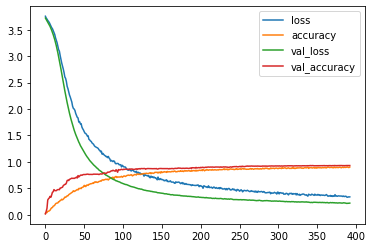

In [39]:
model_loss.plot()

In [40]:
from keras.models import load_model
model.save('Saved Models/classify-minerals.h5')

# REGRESSION MODEL

In [41]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987


In [42]:
x = X.drop(["RESERVE_AMT"],axis=1).values
y = X["RESERVE_AMT"].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# We dont fit to our test set
X_test = scaler.transform(X_test)
import tensorflow as tf
#Lets take a look at the shape of the feature data
X_train.shape

(2322, 23)

In [45]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(23,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1,patience=50)

In [47]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=5000,callbacks=[early_stop])

Epoch 1/5000
19/19 [==============================] - 0s 5ms/step - loss: 1536014254342144.0000 - val_loss: 839758716600320.0000
Epoch 2/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536014522777600.0000 - val_loss: 839758716600320.0000
Epoch 3/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536014254342144.0000 - val_loss: 839758716600320.0000
Epoch 4/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536014522777600.0000 - val_loss: 839758716600320.0000
Epoch 5/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536014522777600.0000 - val_loss: 839758716600320.0000
Epoch 6/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536014388559872.0000 - val_loss: 839758716600320.0000
Epoch 7/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536014388559872.0000 - val_loss: 839758716600320.0000
Epoch 8/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536014388559872.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 1535383833673728.0000 - val_loss: 839444580007936.0000
Epoch 65/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535389605036032.0000 - val_loss: 839421628776448.0000
Epoch 66/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535355513733120.0000 - val_loss: 839398878871552.0000
Epoch 67/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535314711543808.0000 - val_loss: 839372303761408.0000
Epoch 68/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535310819229696.0000 - val_loss: 839347943243776.0000
Epoch 69/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535274043572224.0000 - val_loss: 839320965480448.0000
Epoch 70/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535208008450048.0000 - val_loss: 839295397003264.0000
Epoch 71/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535113653387264.0000 - val_l

Epoch 127/5000
19/19 [==============================] - 0s 2ms/step - loss: 1528538326892544.0000 - val_loss: 835541260042240.0000
Epoch 128/5000
19/19 [==============================] - 0s 2ms/step - loss: 1528549869617152.0000 - val_loss: 835429590892544.0000
Epoch 129/5000
19/19 [==============================] - 0s 3ms/step - loss: 1528958025728000.0000 - val_loss: 835314968952832.0000
Epoch 130/5000
19/19 [==============================] - 0s 2ms/step - loss: 1528391492698112.0000 - val_loss: 835213433241600.0000
Epoch 131/5000
19/19 [==============================] - 0s 3ms/step - loss: 1528569868058624.0000 - val_loss: 835109011849216.0000
Epoch 132/5000
19/19 [==============================] - 0s 3ms/step - loss: 1526705718034432.0000 - val_loss: 834979357523968.0000
Epoch 133/5000
19/19 [==============================] - 0s 2ms/step - loss: 1528065746272256.0000 - val_loss: 834867554156544.0000
Epoch 134/5000
19/19 [==============================] - 0s 3ms/step - loss: 1527919

19/19 [==============================] - 0s 2ms/step - loss: 1481103902769152.0000 - val_loss: 807635985104896.0000
Epoch 252/5000
19/19 [==============================] - 0s 3ms/step - loss: 1477377213333504.0000 - val_loss: 807304198881280.0000
Epoch 253/5000
19/19 [==============================] - 0s 3ms/step - loss: 1475675064107008.0000 - val_loss: 807021737672704.0000
Epoch 254/5000
19/19 [==============================] - 0s 4ms/step - loss: 1469724655353856.0000 - val_loss: 806657202323456.0000
Epoch 255/5000
19/19 [==============================] - 0s 3ms/step - loss: 1469981279649792.0000 - val_loss: 806256763731968.0000
Epoch 256/5000
19/19 [==============================] - 0s 3ms/step - loss: 1467696222830592.0000 - val_loss: 805917528424448.0000
Epoch 257/5000
19/19 [==============================] - 0s 3ms/step - loss: 1473758300733440.0000 - val_loss: 805593258393600.0000
Epoch 258/5000
19/19 [==============================] - 0s 3ms/step - loss: 1475778814410752.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1384445663772672.0000 - val_loss: 758074075774976.0000
Epoch 376/5000
19/19 [==============================] - 0s 2ms/step - loss: 1404506113835008.0000 - val_loss: 757672630550528.0000
Epoch 377/5000
19/19 [==============================] - 0s 2ms/step - loss: 1362788022747136.0000 - val_loss: 757211525545984.0000
Epoch 378/5000
19/19 [==============================] - 0s 2ms/step - loss: 1375642457210880.0000 - val_loss: 756682305044480.0000
Epoch 379/5000
19/19 [==============================] - 0s 3ms/step - loss: 1383238375309312.0000 - val_loss: 756256029540352.0000
Epoch 380/5000
19/19 [==============================] - 0s 3ms/step - loss: 1374639313911808.0000 - val_loss: 755858141085696.0000
Epoch 381/5000
19/19 [==============================] - 0s 3ms/step - loss: 1350929081171968.0000 - val_loss: 755381064171520.0000
Epoch 382/5000
19/19 [==============================] - 0s 3ms/step - loss: 1381423214755840.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1276333820739584.0000 - val_loss: 701393325260800.0000
Epoch 500/5000
19/19 [==============================] - 0s 3ms/step - loss: 1255140707270656.0000 - val_loss: 700944031416320.0000
Epoch 501/5000
19/19 [==============================] - 0s 3ms/step - loss: 1286407800750080.0000 - val_loss: 700483060629504.0000
Epoch 502/5000
19/19 [==============================] - 0s 2ms/step - loss: 1279225139036160.0000 - val_loss: 700067119890432.0000
Epoch 503/5000
19/19 [==============================] - 0s 2ms/step - loss: 1246744314642432.0000 - val_loss: 699600176414720.0000
Epoch 504/5000
19/19 [==============================] - 0s 3ms/step - loss: 1237295655026688.0000 - val_loss: 698974788911104.0000
Epoch 505/5000
19/19 [==============================] - 0s 2ms/step - loss: 1247632030695424.0000 - val_loss: 698382083424256.0000
Epoch 506/5000
19/19 [==============================] - 0s 2ms/step - loss: 1264396496011264.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1178542649901056.0000 - val_loss: 644616072200192.0000
Epoch 624/5000
19/19 [==============================] - 0s 3ms/step - loss: 1209222675038208.0000 - val_loss: 644177314447360.0000
Epoch 625/5000
19/19 [==============================] - 0s 2ms/step - loss: 1124579741270016.0000 - val_loss: 643736073666560.0000
Epoch 626/5000
19/19 [==============================] - 0s 3ms/step - loss: 1167577464176640.0000 - val_loss: 643315703742464.0000
Epoch 627/5000
19/19 [==============================] - 0s 3ms/step - loss: 1173946900676608.0000 - val_loss: 642837485977600.0000
Epoch 628/5000
19/19 [==============================] - 0s 2ms/step - loss: 1152190341185536.0000 - val_loss: 642392956862464.0000
Epoch 629/5000
19/19 [==============================] - 0s 2ms/step - loss: 1212817831100416.0000 - val_loss: 642019361816576.0000
Epoch 630/5000
19/19 [==============================] - 0s 3ms/step - loss: 1170988205080576.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1079576939724800.0000 - val_loss: 595551506661376.0000
Epoch 748/5000
19/19 [==============================] - 0s 3ms/step - loss: 1040391537164288.0000 - val_loss: 595201668153344.0000
Epoch 749/5000
19/19 [==============================] - 0s 3ms/step - loss: 1063174593839104.0000 - val_loss: 594850554576896.0000
Epoch 750/5000
19/19 [==============================] - 0s 3ms/step - loss: 1091454470455296.0000 - val_loss: 594499306782720.0000
Epoch 751/5000
19/19 [==============================] - 0s 3ms/step - loss: 1021860967874560.0000 - val_loss: 594130610683904.0000
Epoch 752/5000
19/19 [==============================] - 0s 3ms/step - loss: 1131509805219840.0000 - val_loss: 593825399570432.0000
Epoch 753/5000
19/19 [==============================] - 0s 3ms/step - loss: 1092761952452608.0000 - val_loss: 593517638320128.0000
Epoch 754/5000
19/19 [==============================] - 0s 3ms/step - loss: 1103719085113344.0000 

Epoch 872/5000
19/19 [==============================] - 0s 3ms/step - loss: 1075967690801152.0000 - val_loss: 559621924192256.0000
Epoch 873/5000
19/19 [==============================] - 0s 3ms/step - loss: 1006485790261248.0000 - val_loss: 559360300285952.0000
Epoch 874/5000
19/19 [==============================] - 0s 3ms/step - loss: 1092416274694144.0000 - val_loss: 559116258902016.0000
Epoch 875/5000
19/19 [==============================] - 0s 3ms/step - loss: 1013464306810880.0000 - val_loss: 558880505462784.0000
Epoch 876/5000
19/19 [==============================] - 0s 3ms/step - loss: 1069445514526720.0000 - val_loss: 558654247927808.0000
Epoch 877/5000
19/19 [==============================] - 0s 2ms/step - loss: 983641261867008.0000 - val_loss: 558419165577216.0000
Epoch 878/5000
19/19 [==============================] - 0s 2ms/step - loss: 1069492893384704.0000 - val_loss: 558214986858496.0000
Epoch 879/5000
19/19 [==============================] - 0s 2ms/step - loss: 10594132

Epoch 997/5000
19/19 [==============================] - 0s 3ms/step - loss: 1039133447290880.0000 - val_loss: 534050225782784.0000
Epoch 998/5000
19/19 [==============================] - 0s 3ms/step - loss: 1016627147571200.0000 - val_loss: 533872387293184.0000
Epoch 999/5000
19/19 [==============================] - 0s 3ms/step - loss: 1029820347580416.0000 - val_loss: 533687938580480.0000
Epoch 1000/5000
19/19 [==============================] - 0s 3ms/step - loss: 970709652209664.0000 - val_loss: 533505603796992.0000
Epoch 1001/5000
19/19 [==============================] - 0s 3ms/step - loss: 916997462294528.0000 - val_loss: 533327094218752.0000
Epoch 1002/5000
19/19 [==============================] - 0s 2ms/step - loss: 1027432144437248.0000 - val_loss: 533111473438720.0000
Epoch 1003/5000
19/19 [==============================] - 0s 2ms/step - loss: 1038198956359680.0000 - val_loss: 532908972441600.0000
Epoch 1004/5000
19/19 [==============================] - 0s 3ms/step - loss: 9481

19/19 [==============================] - 0s 2ms/step - loss: 947347378929664.0000 - val_loss: 511299616243712.0000
Epoch 1122/5000
19/19 [==============================] - 0s 2ms/step - loss: 993980388999168.0000 - val_loss: 511130971668480.0000
Epoch 1123/5000
19/19 [==============================] - 0s 3ms/step - loss: 977853592109056.0000 - val_loss: 510976889716736.0000
Epoch 1124/5000
19/19 [==============================] - 0s 3ms/step - loss: 869011940179968.0000 - val_loss: 510766906081280.0000
Epoch 1125/5000
19/19 [==============================] - 0s 3ms/step - loss: 997085180592128.0000 - val_loss: 510593496776704.0000
Epoch 1126/5000
19/19 [==============================] - 0s 3ms/step - loss: 1041781227520000.0000 - val_loss: 510433307918336.0000
Epoch 1127/5000
19/19 [==============================] - 0s 3ms/step - loss: 918027986010112.0000 - val_loss: 510283017617408.0000
Epoch 1128/5000
19/19 [==============================] - 0s 3ms/step - loss: 865649450549248.0000 

19/19 [==============================] - 0s 3ms/step - loss: 892226506850304.0000 - val_loss: 489154597093376.0000
Epoch 1246/5000
19/19 [==============================] - 0s 3ms/step - loss: 906787519725568.0000 - val_loss: 488980986462208.0000
Epoch 1247/5000
19/19 [==============================] - 0s 3ms/step - loss: 911863835525120.0000 - val_loss: 488769056669696.0000
Epoch 1248/5000
19/19 [==============================] - 0s 3ms/step - loss: 880523996037120.0000 - val_loss: 488566958325760.0000
Epoch 1249/5000
19/19 [==============================] - 0s 3ms/step - loss: 905064164098048.0000 - val_loss: 488391770636288.0000
Epoch 1250/5000
19/19 [==============================] - 0s 3ms/step - loss: 911963156643840.0000 - val_loss: 488187961016320.0000
Epoch 1251/5000
19/19 [==============================] - 0s 3ms/step - loss: 898930615255040.0000 - val_loss: 488025322684416.0000
Epoch 1252/5000
19/19 [==============================] - 0s 3ms/step - loss: 850867112640512.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 925940523728896.0000 - val_loss: 466029721419776.0000
Epoch 1370/5000
19/19 [==============================] - 0s 3ms/step - loss: 855985572806656.0000 - val_loss: 465836884099072.0000
Epoch 1371/5000
19/19 [==============================] - 0s 3ms/step - loss: 833495781867520.0000 - val_loss: 465603412361216.0000
Epoch 1372/5000
19/19 [==============================] - 0s 3ms/step - loss: 809149826859008.0000 - val_loss: 465446880935936.0000
Epoch 1373/5000
19/19 [==============================] - 0s 3ms/step - loss: 915563412979712.0000 - val_loss: 465230689730560.0000
Epoch 1374/5000
19/19 [==============================] - 0s 2ms/step - loss: 762668482822144.0000 - val_loss: 465024229310464.0000
Epoch 1375/5000
19/19 [==============================] - 0s 3ms/step - loss: 887835775205376.0000 - val_loss: 464840317468672.0000
Epoch 1376/5000
19/19 [==============================] - 0s 3ms/step - loss: 983520734347264.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 736765333733376.0000 - val_loss: 439805422862336.0000
Epoch 1494/5000
19/19 [==============================] - 0s 3ms/step - loss: 822243303096320.0000 - val_loss: 439564636258304.0000
Epoch 1495/5000
19/19 [==============================] - 0s 3ms/step - loss: 809101038714880.0000 - val_loss: 439320594874368.0000
Epoch 1496/5000
19/19 [==============================] - 0s 3ms/step - loss: 830584129585152.0000 - val_loss: 439130576125952.0000
Epoch 1497/5000
19/19 [==============================] - 0s 2ms/step - loss: 912802084552704.0000 - val_loss: 438918914768896.0000
Epoch 1498/5000
19/19 [==============================] - 0s 2ms/step - loss: 798627089874944.0000 - val_loss: 438740640071680.0000
Epoch 1499/5000
19/19 [==============================] - 0s 3ms/step - loss: 837049598869504.0000 - val_loss: 438473345466368.0000
Epoch 1500/5000
19/19 [==============================] - 0s 3ms/step - loss: 928884925136896.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 836443941371904.0000 - val_loss: 411498870472704.0000
Epoch 1618/5000
19/19 [==============================] - 0s 3ms/step - loss: 784644555407360.0000 - val_loss: 411243789680640.0000
Epoch 1619/5000
19/19 [==============================] - 0s 3ms/step - loss: 838025965731840.0000 - val_loss: 411009277755392.0000
Epoch 1620/5000
19/19 [==============================] - 0s 3ms/step - loss: 805839480815616.0000 - val_loss: 410745372147712.0000
Epoch 1621/5000
19/19 [==============================] - 0s 3ms/step - loss: 785460867629056.0000 - val_loss: 410502807158784.0000
Epoch 1622/5000
19/19 [==============================] - 0s 3ms/step - loss: 811304558264320.0000 - val_loss: 410225949540352.0000
Epoch 1623/5000
19/19 [==============================] - 0s 4ms/step - loss: 779344901308416.0000 - val_loss: 409968956145664.0000
Epoch 1624/5000
19/19 [==============================] - 0s 3ms/step - loss: 793757133832192.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 695541029666816.0000 - val_loss: 379012912250880.0000
Epoch 1742/5000
19/19 [==============================] - 0s 3ms/step - loss: 667130223656960.0000 - val_loss: 378744879448064.0000
Epoch 1743/5000
19/19 [==============================] - 0s 2ms/step - loss: 743778075803648.0000 - val_loss: 378528151371776.0000
Epoch 1744/5000
19/19 [==============================] - 0s 3ms/step - loss: 713775179104256.0000 - val_loss: 378243744006144.0000
Epoch 1745/5000
19/19 [==============================] - 0s 4ms/step - loss: 725622913499136.0000 - val_loss: 378001581670400.0000
Epoch 1746/5000
19/19 [==============================] - 0s 3ms/step - loss: 670530898231296.0000 - val_loss: 377739857100800.0000
Epoch 1747/5000
19/19 [==============================] - 0s 3ms/step - loss: 698831914139648.0000 - val_loss: 377490916769792.0000
Epoch 1748/5000
19/19 [==============================] - 0s 3ms/step - loss: 739046162694144.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 614002619056128.0000 - val_loss: 343911721598976.0000
Epoch 1866/5000
19/19 [==============================] - 0s 3ms/step - loss: 673139621101568.0000 - val_loss: 343530308370432.0000
Epoch 1867/5000
19/19 [==============================] - 0s 3ms/step - loss: 637263155298304.0000 - val_loss: 343150472200192.0000
Epoch 1868/5000
19/19 [==============================] - 0s 3ms/step - loss: 726286284619776.0000 - val_loss: 342809659834368.0000
Epoch 1869/5000
19/19 [==============================] - 0s 4ms/step - loss: 769898389176320.0000 - val_loss: 342474954375168.0000
Epoch 1870/5000
19/19 [==============================] - 0s 5ms/step - loss: 812762699661312.0000 - val_loss: 342128941072384.0000
Epoch 1871/5000
19/19 [==============================] - 0s 3ms/step - loss: 762298243219456.0000 - val_loss: 341894261374976.0000
Epoch 1872/5000
19/19 [==============================] - 0s 3ms/step - loss: 756456282390528.0000 -

19/19 [==============================] - 0s 4ms/step - loss: 691803602812928.0000 - val_loss: 307349872967680.0000
Epoch 1990/5000
19/19 [==============================] - 0s 3ms/step - loss: 604333708148736.0000 - val_loss: 307056942776320.0000
Epoch 1991/5000
19/19 [==============================] - 0s 3ms/step - loss: 666699317641216.0000 - val_loss: 306730021945344.0000
Epoch 1992/5000
19/19 [==============================] - 0s 3ms/step - loss: 624264638103552.0000 - val_loss: 306365318823936.0000
Epoch 1993/5000
19/19 [==============================] - 0s 3ms/step - loss: 766556569075712.0000 - val_loss: 306011487338496.0000
Epoch 1994/5000
19/19 [==============================] - 0s 3ms/step - loss: 698185588670464.0000 - val_loss: 305646784217088.0000
Epoch 1995/5000
19/19 [==============================] - 0s 3ms/step - loss: 693297177690112.0000 - val_loss: 305365564522496.0000
Epoch 1996/5000
19/19 [==============================] - 0s 2ms/step - loss: 667295177244672.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 593303695261696.0000 - val_loss: 273384130740224.0000
Epoch 2114/5000
19/19 [==============================] - 0s 5ms/step - loss: 555465570254848.0000 - val_loss: 273166412808192.0000
Epoch 2115/5000
19/19 [==============================] - 0s 3ms/step - loss: 578073405685760.0000 - val_loss: 272882626199552.0000
Epoch 2116/5000
19/19 [==============================] - 0s 3ms/step - loss: 622094203224064.0000 - val_loss: 272643936747520.0000
Epoch 2117/5000
19/19 [==============================] - 0s 3ms/step - loss: 630251889623040.0000 - val_loss: 272255779078144.0000
Epoch 2118/5000
19/19 [==============================] - 0s 4ms/step - loss: 606405694324736.0000 - val_loss: 271951541043200.0000
Epoch 2119/5000
19/19 [==============================] - 0s 4ms/step - loss: 584769595244544.0000 - val_loss: 271667385335808.0000
Epoch 2120/5000
19/19 [==============================] - 0s 4ms/step - loss: 671287684890624.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 562941363486720.0000 - val_loss: 238920356855808.0000
Epoch 2238/5000
19/19 [==============================] - 0s 3ms/step - loss: 587485423861760.0000 - val_loss: 238530957672448.0000
Epoch 2239/5000
19/19 [==============================] - 0s 4ms/step - loss: 548871050625024.0000 - val_loss: 238222340784128.0000
Epoch 2240/5000
19/19 [==============================] - 0s 4ms/step - loss: 508099496509440.0000 - val_loss: 237918488625152.0000
Epoch 2241/5000
19/19 [==============================] - 0s 4ms/step - loss: 577970192252928.0000 - val_loss: 237613965377536.0000
Epoch 2242/5000
19/19 [==============================] - 0s 4ms/step - loss: 519798618324992.0000 - val_loss: 237309559570432.0000
Epoch 2243/5000
19/19 [==============================] - 0s 4ms/step - loss: 580599517544448.0000 - val_loss: 236975676194816.0000
Epoch 2244/5000
19/19 [==============================] - 0s 5ms/step - loss: 554650231111680.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 583918319304704.0000 - val_loss: 208232731639808.0000
Epoch 2362/5000
19/19 [==============================] - 0s 3ms/step - loss: 487565392084992.0000 - val_loss: 208042108911616.0000
Epoch 2363/5000
19/19 [==============================] - 0s 3ms/step - loss: 533842356076544.0000 - val_loss: 207926195126272.0000
Epoch 2364/5000
19/19 [==============================] - 0s 4ms/step - loss: 472704570359808.0000 - val_loss: 207761040211968.0000
Epoch 2365/5000
19/19 [==============================] - 0s 3ms/step - loss: 564973285670912.0000 - val_loss: 207373016760320.0000
Epoch 2366/5000
19/19 [==============================] - 0s 3ms/step - loss: 585028299915264.0000 - val_loss: 207046112706560.0000
Epoch 2367/5000
19/19 [==============================] - 0s 3ms/step - loss: 565806844870656.0000 - val_loss: 206846447058944.0000
Epoch 2368/5000
19/19 [==============================] - 0s 3ms/step - loss: 525574611140608.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 577275145748480.0000 - val_loss: 180339083313152.0000
Epoch 2486/5000
19/19 [==============================] - 0s 4ms/step - loss: 566597320179712.0000 - val_loss: 180194279161856.0000
Epoch 2487/5000
19/19 [==============================] - 0s 4ms/step - loss: 581006264369152.0000 - val_loss: 180400387260416.0000
Epoch 2488/5000
19/19 [==============================] - 0s 4ms/step - loss: 475004458237952.0000 - val_loss: 180408205443072.0000
Epoch 2489/5000
19/19 [==============================] - 0s 2ms/step - loss: 544104240906240.0000 - val_loss: 180253905387520.0000
Epoch 2490/5000
19/19 [==============================] - 0s 2ms/step - loss: 574449996791808.0000 - val_loss: 180123949072384.0000
Epoch 2491/5000
19/19 [==============================] - 0s 2ms/step - loss: 427076582637568.0000 - val_loss: 179963055570944.0000
Epoch 2492/5000
19/19 [==============================] - 0s 2ms/step - loss: 710605694566400.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 544677216387072.0000 - val_loss: 162304213647360.0000
Epoch 2610/5000
19/19 [==============================] - 0s 3ms/step - loss: 465494830219264.0000 - val_loss: 162108775858176.0000
Epoch 2611/5000
19/19 [==============================] - 0s 3ms/step - loss: 512764065873920.0000 - val_loss: 161930870259712.0000
Epoch 2612/5000
19/19 [==============================] - 0s 3ms/step - loss: 443888124821504.0000 - val_loss: 162068309213184.0000
Epoch 2613/5000
19/19 [==============================] - 0s 3ms/step - loss: 425918854070272.0000 - val_loss: 162087938555904.0000
Epoch 2614/5000
19/19 [==============================] - 0s 3ms/step - loss: 461358340505600.0000 - val_loss: 161882467991552.0000
Epoch 2615/5000
19/19 [==============================] - 0s 3ms/step - loss: 408260666458112.0000 - val_loss: 161654264299520.0000
Epoch 2616/5000
19/19 [==============================] - 0s 4ms/step - loss: 539897085558784.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 481512877195264.0000 - val_loss: 149764184211456.0000
Epoch 2734/5000
19/19 [==============================] - 0s 2ms/step - loss: 386365359390720.0000 - val_loss: 149715949715456.0000
Epoch 2735/5000
19/19 [==============================] - 0s 2ms/step - loss: 454982662881280.0000 - val_loss: 150021328601088.0000
Epoch 2736/5000
19/19 [==============================] - 0s 4ms/step - loss: 520864407748608.0000 - val_loss: 149742558380032.0000
Epoch 2737/5000
19/19 [==============================] - 0s 4ms/step - loss: 451706039042048.0000 - val_loss: 149574584893440.0000
Epoch 2738/5000
19/19 [==============================] - 0s 4ms/step - loss: 428871878967296.0000 - val_loss: 149555123322880.0000
Epoch 2739/5000
19/19 [==============================] - 0s 2ms/step - loss: 404009957457920.0000 - val_loss: 149115241496576.0000
Epoch 2740/5000
19/19 [==============================] - 0s 3ms/step - loss: 453678636990464.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 348778791960576.0000 - val_loss: 141831379615744.0000
Epoch 2858/5000
19/19 [==============================] - 0s 3ms/step - loss: 472409526239232.0000 - val_loss: 141710801764352.0000
Epoch 2859/5000
19/19 [==============================] - 0s 3ms/step - loss: 682211128901632.0000 - val_loss: 141772592250880.0000
Epoch 2860/5000
19/19 [==============================] - 0s 3ms/step - loss: 498379381538816.0000 - val_loss: 141747795525632.0000
Epoch 2861/5000
19/19 [==============================] - 0s 3ms/step - loss: 513637420630016.0000 - val_loss: 141206747086848.0000
Epoch 2862/5000
19/19 [==============================] - 0s 3ms/step - loss: 466117936021504.0000 - val_loss: 141084978053120.0000
Epoch 2863/5000
19/19 [==============================] - 0s 3ms/step - loss: 454227553943552.0000 - val_loss: 140886688137216.0000
Epoch 2864/5000
19/19 [==============================] - 0s 3ms/step - loss: 458608923901952.0000 -

19/19 [==============================] - 0s 4ms/step - loss: 482516725137408.0000 - val_loss: 134361819119616.0000
Epoch 2982/5000
19/19 [==============================] - 0s 2ms/step - loss: 360264876687360.0000 - val_loss: 134252356173824.0000
Epoch 2983/5000
19/19 [==============================] - 0s 3ms/step - loss: 450784332349440.0000 - val_loss: 134208131432448.0000
Epoch 2984/5000
19/19 [==============================] - 0s 2ms/step - loss: 527440036233216.0000 - val_loss: 134418635161600.0000
Epoch 2985/5000
19/19 [==============================] - 0s 3ms/step - loss: 560094337040384.0000 - val_loss: 134562524954624.0000
Epoch 2986/5000
19/19 [==============================] - 0s 2ms/step - loss: 500808017772544.0000 - val_loss: 134422326149120.0000
Epoch 2987/5000
19/19 [==============================] - 0s 2ms/step - loss: 463567899852800.0000 - val_loss: 134424574296064.0000
Epoch 2988/5000
19/19 [==============================] - 0s 3ms/step - loss: 512096601112576.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 476106855546880.0000 - val_loss: 131308642631680.0000
Epoch 3106/5000
19/19 [==============================] - 0s 3ms/step - loss: 426438813548544.0000 - val_loss: 131418550173696.0000
Epoch 3107/5000
19/19 [==============================] - 0s 4ms/step - loss: 437936306782208.0000 - val_loss: 130914159951872.0000
Epoch 3108/5000
19/19 [==============================] - 0s 3ms/step - loss: 447405031948288.0000 - val_loss: 130598286917632.0000
Epoch 3109/5000
19/19 [==============================] - 0s 3ms/step - loss: 433206339829760.0000 - val_loss: 130540279693312.0000
Epoch 3110/5000
19/19 [==============================] - 0s 4ms/step - loss: 602661221040128.0000 - val_loss: 131016937177088.0000
Epoch 3111/5000
19/19 [==============================] - 0s 4ms/step - loss: 419493884985344.0000 - val_loss: 131191806099456.0000
Epoch 3112/5000
19/19 [==============================] - 0s 3ms/step - loss: 477048896225280.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 491776137756672.0000 - val_loss: 128495229337600.0000
Epoch 3230/5000
19/19 [==============================] - 0s 3ms/step - loss: 502413899333632.0000 - val_loss: 128745386016768.0000
Epoch 3231/5000
19/19 [==============================] - 0s 2ms/step - loss: 375702062891008.0000 - val_loss: 128698225262592.0000
Epoch 3232/5000
19/19 [==============================] - 0s 2ms/step - loss: 483907958996992.0000 - val_loss: 128574921113600.0000
Epoch 3233/5000
19/19 [==============================] - 0s 3ms/step - loss: 428883589464064.0000 - val_loss: 128407476109312.0000
Epoch 3234/5000
19/19 [==============================] - 0s 2ms/step - loss: 438020796841984.0000 - val_loss: 128332163186688.0000
Epoch 3235/5000
19/19 [==============================] - 0s 3ms/step - loss: 509247326519296.0000 - val_loss: 128396034048000.0000
Epoch 3236/5000
19/19 [==============================] - 0s 4ms/step - loss: 421097719726080.0000 -

In [48]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.536014e+15,8.397587e+14
1,1.536015e+15,8.397587e+14
2,1.536014e+15,8.397587e+14
3,1.536015e+15,8.397587e+14
4,1.536015e+15,8.397587e+14
...,...,...
3246,4.213461e+14,1.283209e+14
3247,4.162885e+14,1.282245e+14
3248,5.038178e+14,1.284782e+14
3249,5.123991e+14,1.287106e+14


<AxesSubplot:>

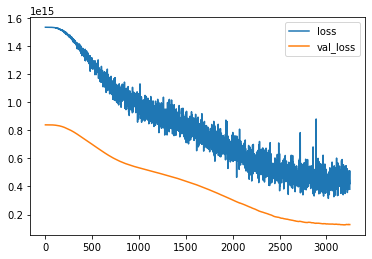

In [49]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [51]:
predictions = model.predict(X_test)

In [52]:
predictions

array([[1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.6107331e+08],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.6107331e+08],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.8104525e+03],
       [1.810452

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

11330971.015011882

In [54]:
mean_absolute_error(y_test,predictions)

1611526.9457485725

In [55]:
X['RESERVE_AMT'].describe()

count    3.318000e+03
mean     5.788774e+06
std      3.597071e+07
min      5.800000e-02
25%      2.150000e+00
50%      5.219500e+01
75%      3.814600e+04
max      2.360000e+08
Name: RESERVE_AMT, dtype: float64

In [56]:
1610640/5784258.0

0.27845230969987855

In [57]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.8457419135943519

In [58]:
model.save('Saved Models/calculate-mineral.h5')

## LOADING THE SAVED MODEL

In [29]:
from keras.models import load_model
model_final = load_model('Saved Models/classify-minerals.h5')

In [30]:
inputs = x_test[0]

In [31]:
inputs

array([0.61682243, 0.14046823, 0.36363636, 0.95238095, 0.42063492,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

In [32]:
inputs.shape

(22,)

In [33]:
inputs=inputs.reshape(1,-1)

In [34]:
prediction = model_final.predict(inputs)

In [35]:
print(prediction)

[[1.18177522e-04 2.08002348e-05 7.02278129e-08 1.93584055e-11
  7.87049093e-10 1.07504461e-09 4.38598852e-10 4.15319299e-08
  3.17277625e-07 8.13262828e-04 8.44385417e-04 6.14560413e-05
  9.98035371e-01 3.24973166e-06 1.35879627e-10 1.42958312e-09
  3.15987614e-09 4.16509362e-11 4.78474504e-09 1.05253992e-08
  3.53926971e-10 2.57223542e-06 1.40381576e-06 9.53119458e-11
  1.04832104e-07 2.43905407e-09 1.64144129e-08 4.49107320e-05
  2.43458298e-09 4.63509150e-06 2.75108287e-05 1.57751562e-10
  1.07919695e-12 1.60076743e-05 1.63685957e-06 1.12011267e-09
  1.35166083e-08 2.02509481e-10 5.29279832e-12 1.41182159e-06
  2.66488883e-06 1.89141515e-11]]


In [36]:
prediction.argmax()

12

In [37]:
y_pred=np.argmax(prediction, axis=1)
y_pred

array([12], dtype=int64)

In [41]:
prediction.max()

0.9980354